# **1. IMPORT LIBRARY**

In [37]:
import seaborn
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.neural_network import MLPClassifier

# **2. DATA UNDERSTANDING**

## **2.1 Import Data**

In [38]:
data_transfusion = pd.read_csv('transfusion.csv', sep=',', skiprows=0)
data_transfusion.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## **2.2 Deskripsi Data**

In [39]:
data_transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


# **3. PLOTTING  DATA**

## **3.1 Plotting Sample Data**

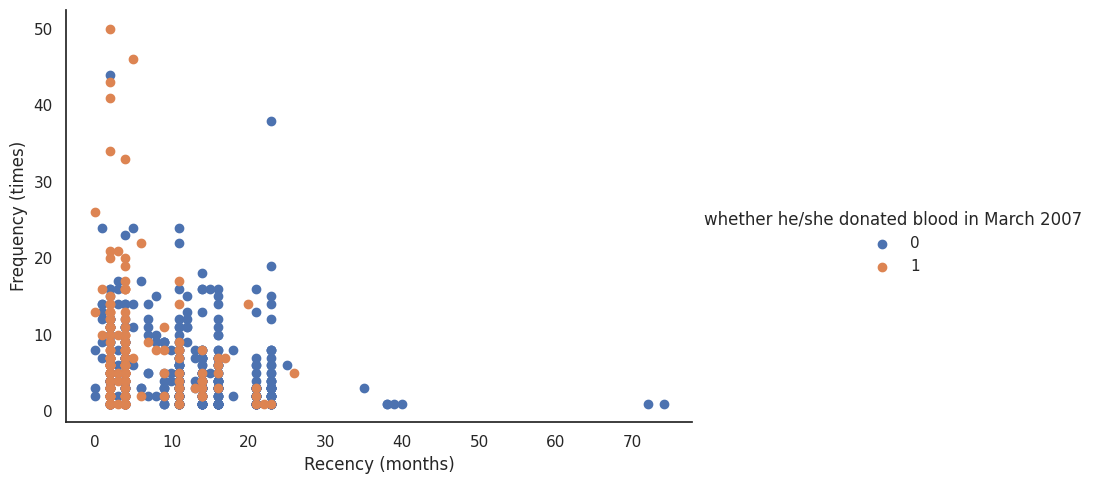

In [40]:
seaborn.set(style="white", color_codes=True)
seaborn.FacetGrid(data_transfusion, hue="whether he/she donated blood in March 2007",
                  height=5, aspect=1.5).map(plt.scatter, "Recency (months)", "Frequency (times)").add_legend()

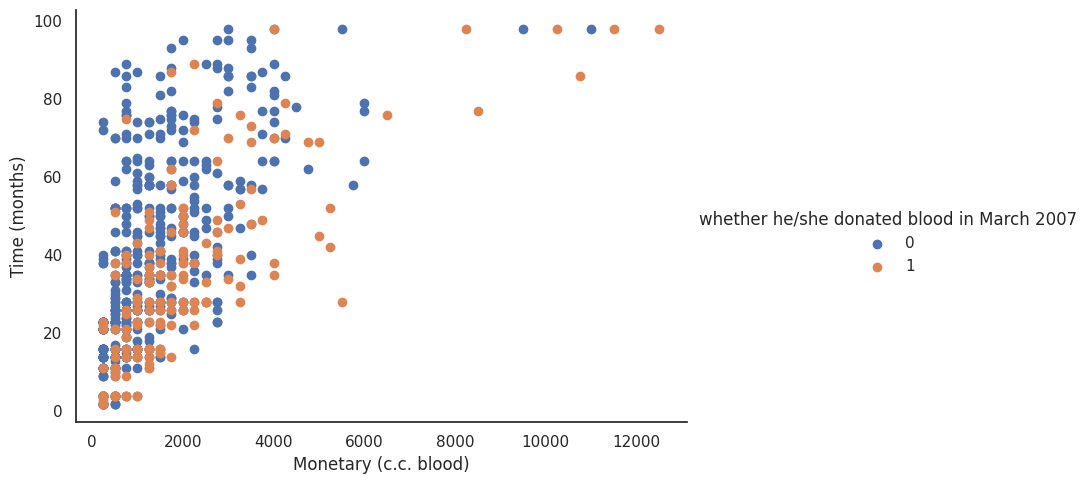

In [41]:
seaborn.FacetGrid(data_transfusion, hue="whether he/she donated blood in March 2007",
                  height=5, aspect=1.5).map(plt.scatter, "Monetary (c.c. blood)", "Time (months)").add_legend()

## **3.2 Plotting Penyebaran Data**

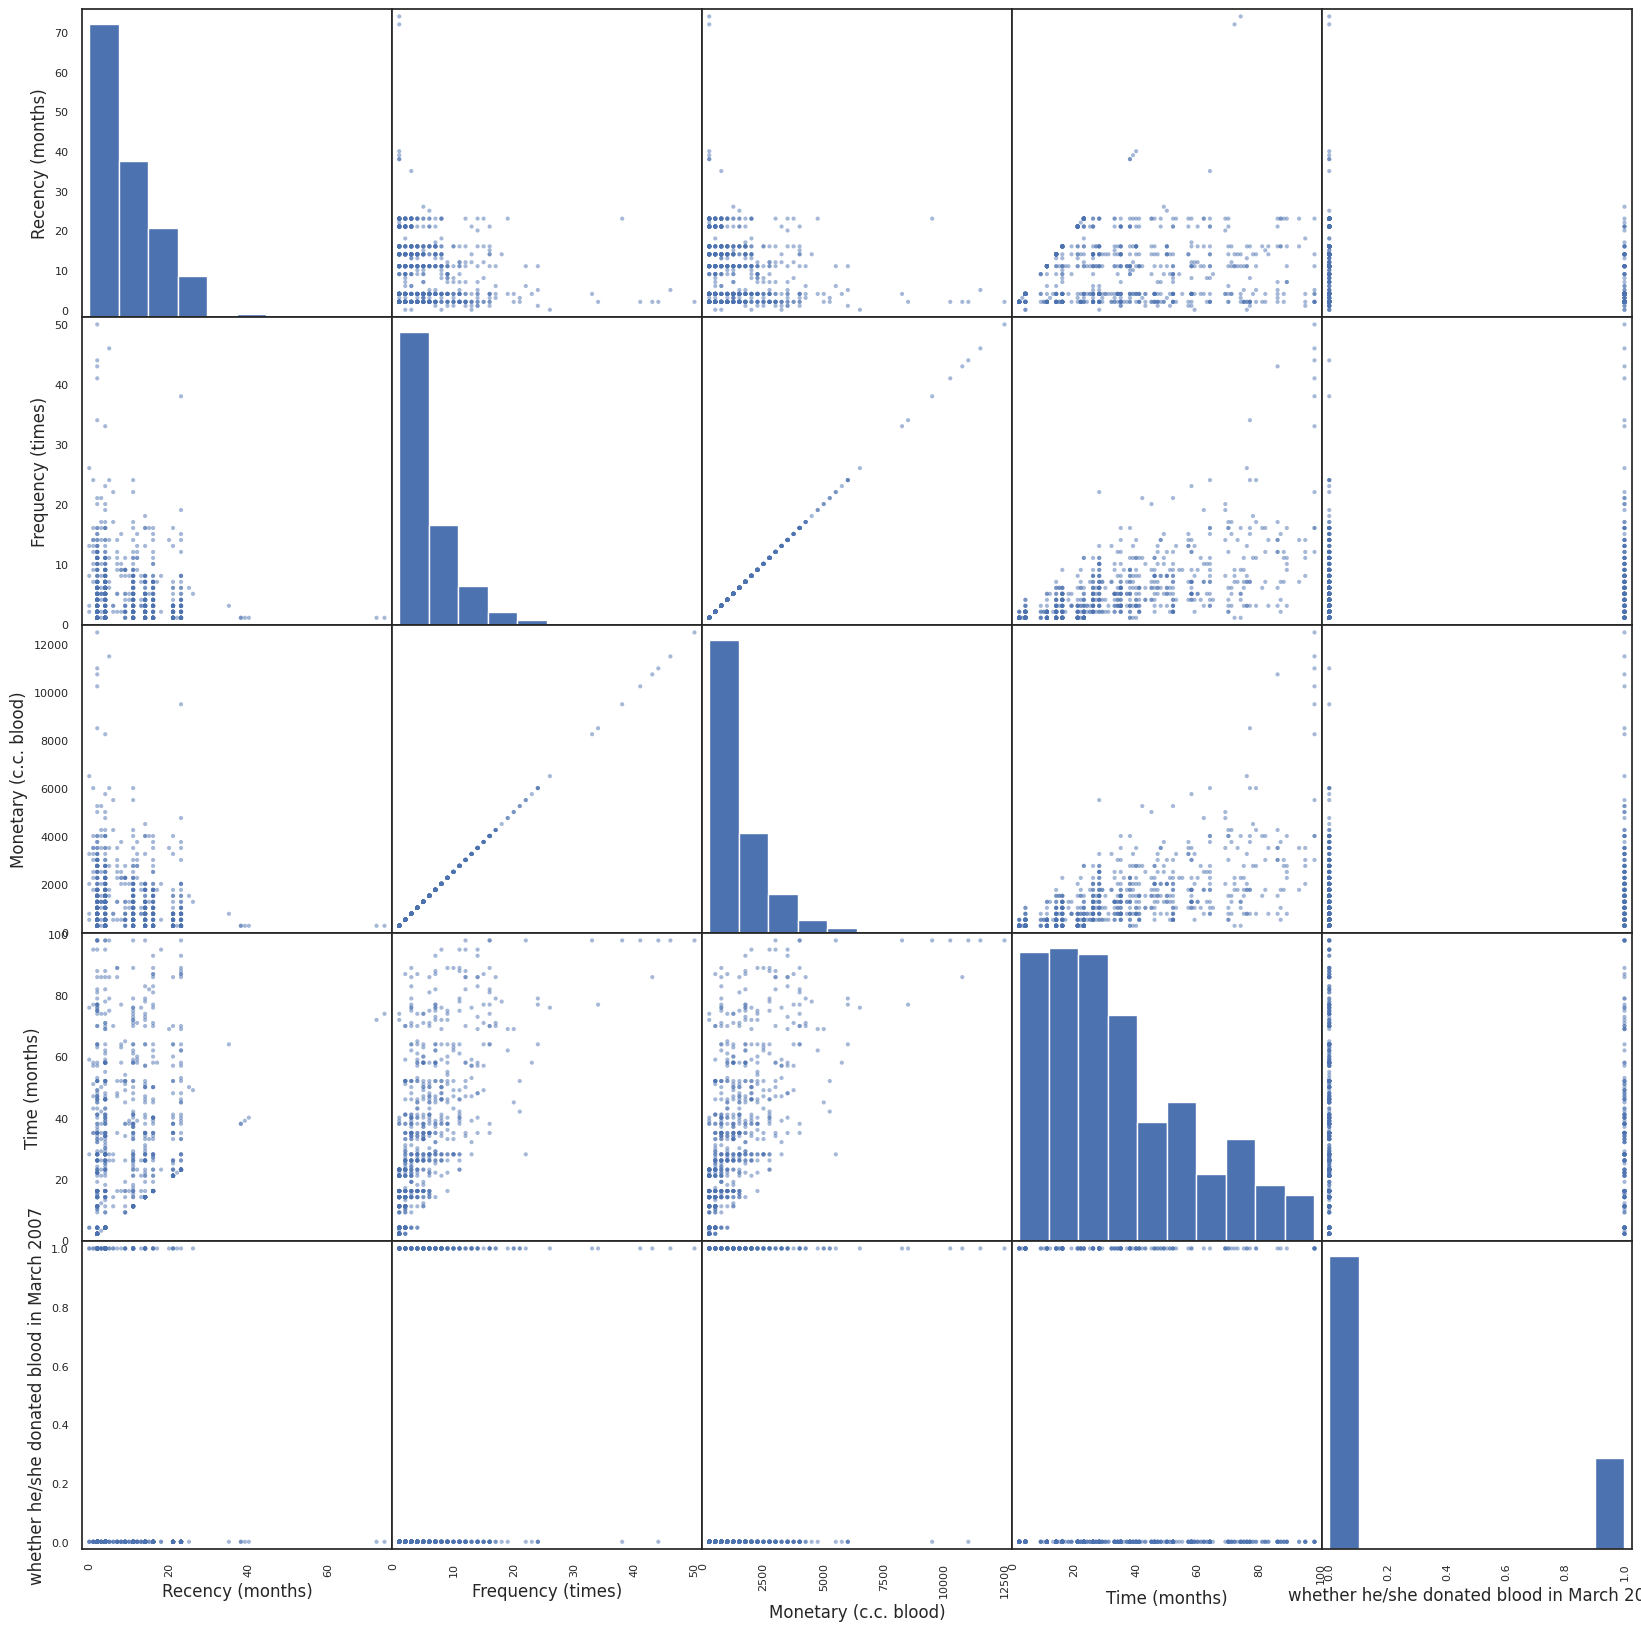

In [42]:
scatter_matrix(data_transfusion, alpha = 0.5, figsize = (20,20)) #datanya ada di atas
plt.show()

## **3.3 Plotting Jumlah Data**

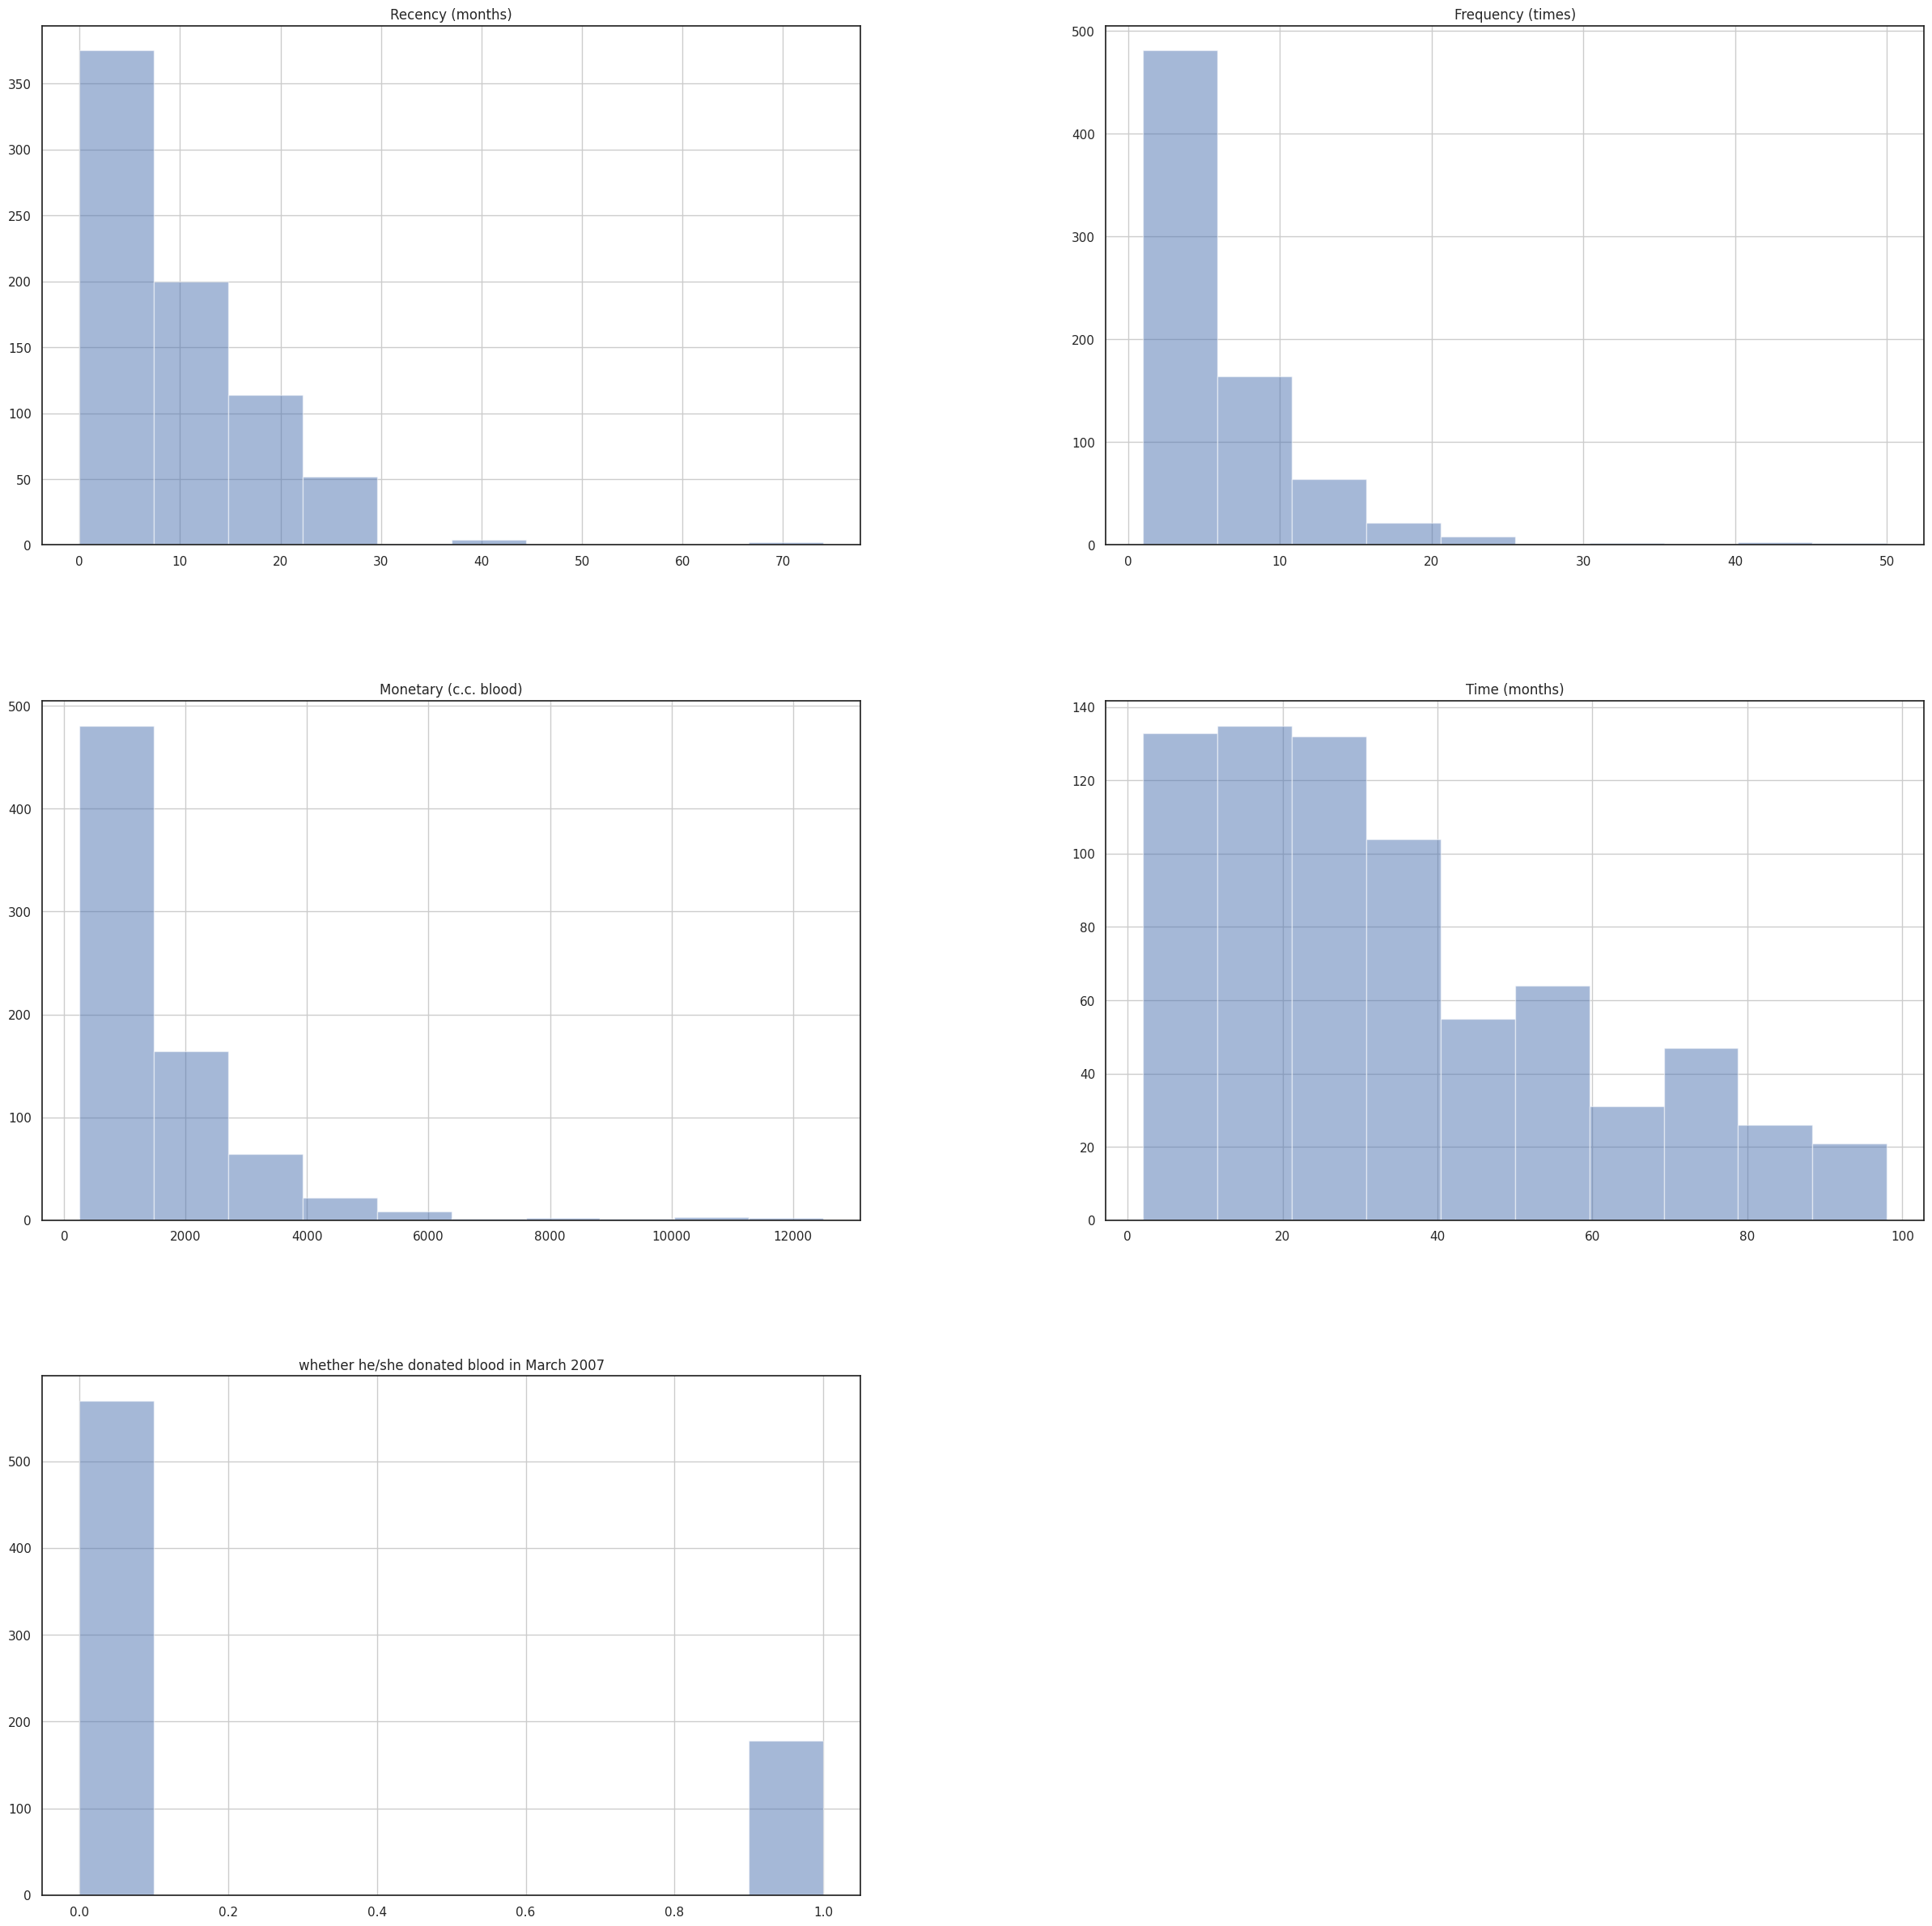

In [43]:
data_transfusion.hist(alpha = 0.5,figsize = (30,30), sharex = False, sharey = False)
plt.show()

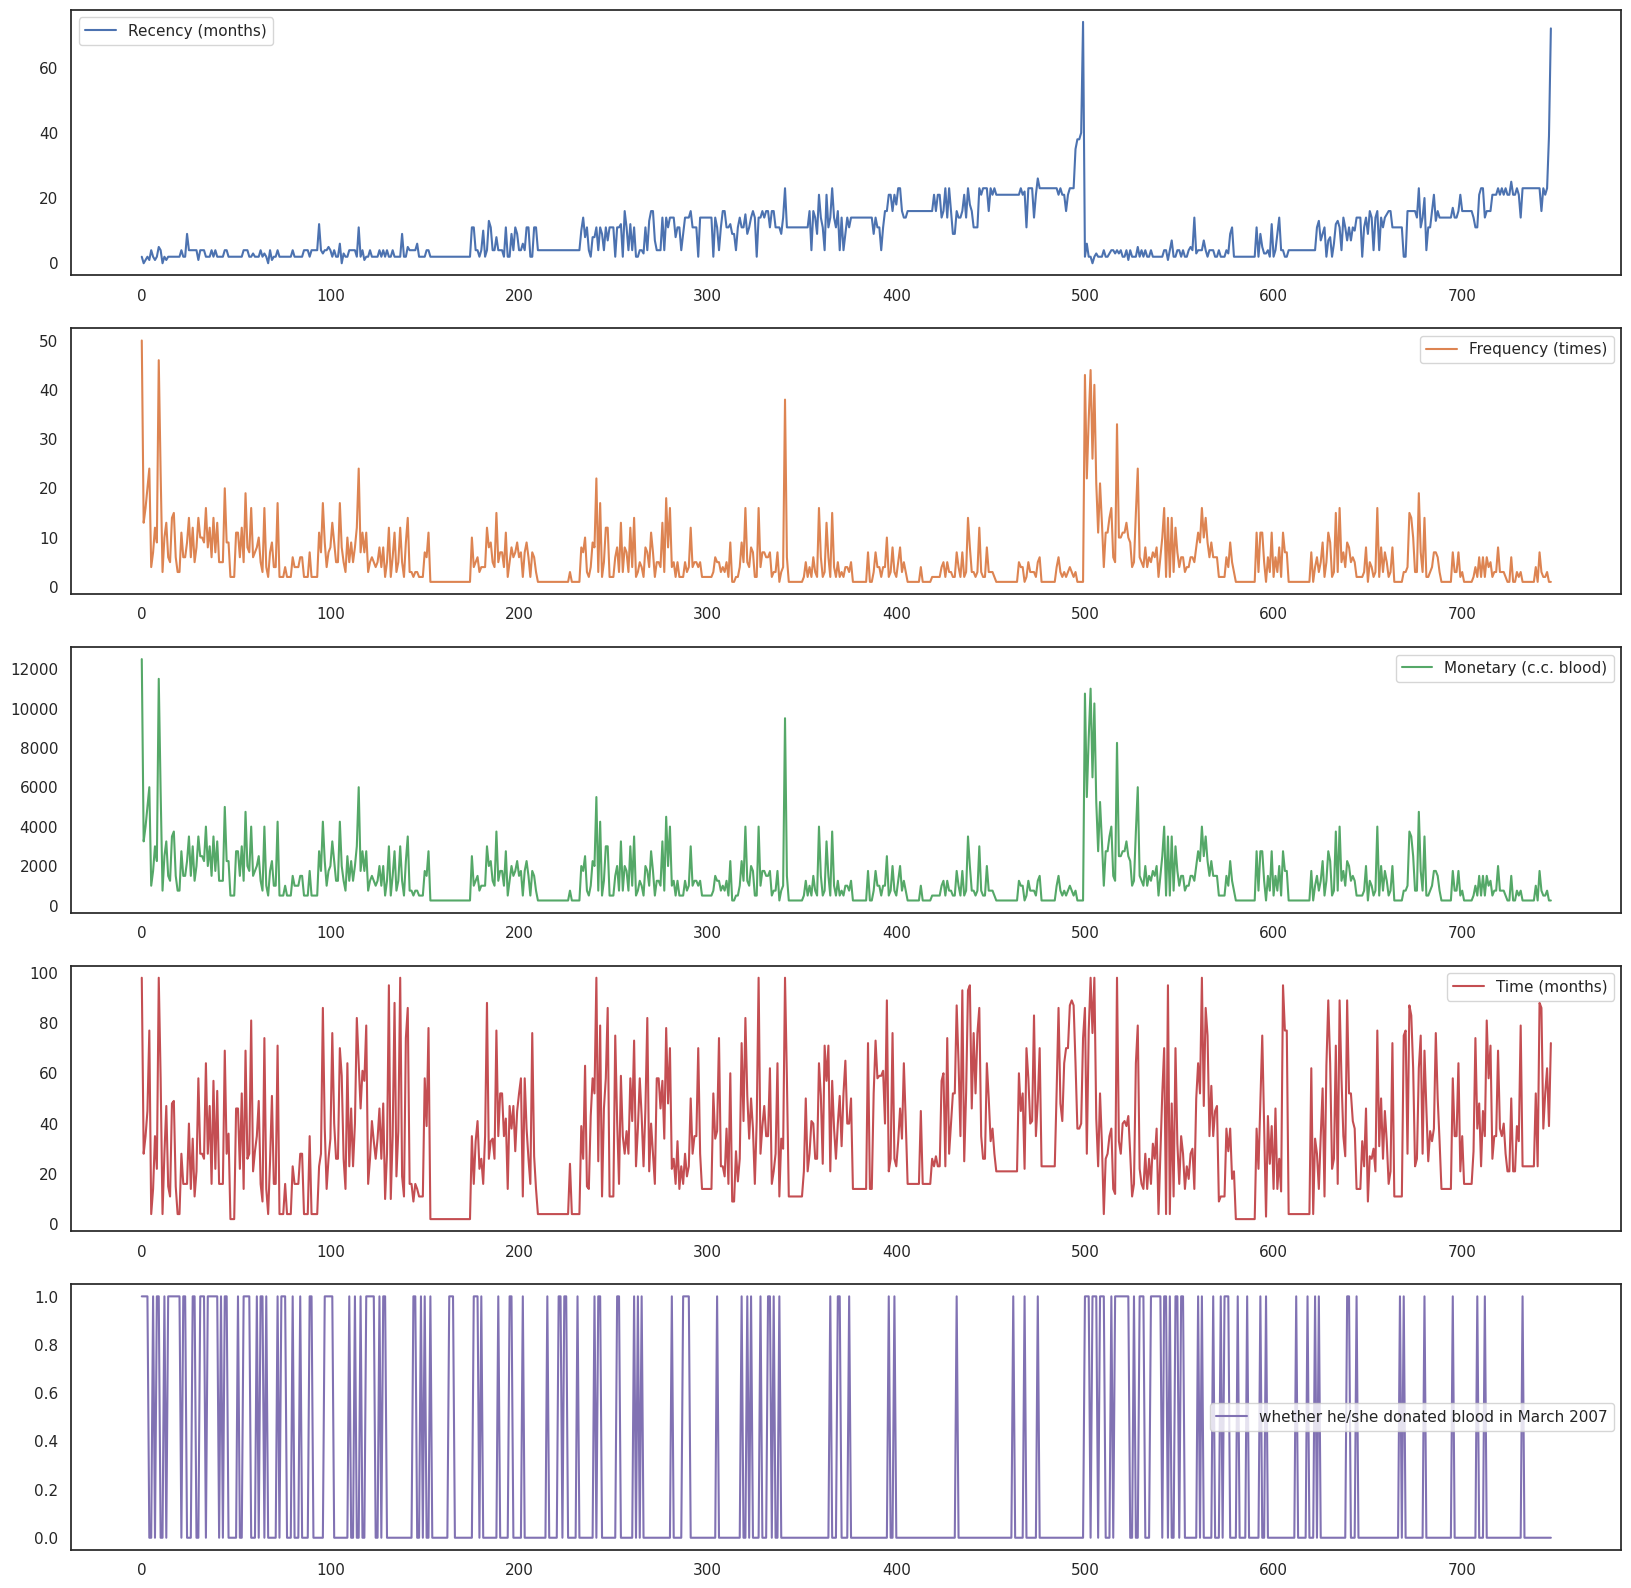

In [44]:
data_transfusion.plot(subplots = True,figsize = (20,20), sharex = False, sharey = False)
plt.show()

# **4. PEMBAGIAN DATA**

In [45]:
X = data_transfusion.iloc[:, 0:4].values
y = data_transfusion['whether he/she donated blood in March 2007'].values
print(X)
print(y)

[[    2    50 12500    98]
 [    0    13  3250    28]
 [    1    16  4000    35]
 ...
 [   23     3   750    62]
 [   39     1   250    39]
 [   72     1   250    72]]
[1 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [47]:
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

# **5. IMPLEMENTASI MLP**

## **SKELEARN**

In [48]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(9, 9), random_state=42)

In [49]:
clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(9, 9), random_state=42)

In [50]:
prediction = clf.predict(X_test)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [51]:
print(y_test)

[0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0]


In [52]:
print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,y_test))

The accuracy of the Multi-layer Perceptron is: 0.7733333333333333


## **KERAS**

In [53]:
mymodel = models.Sequential()
mymodel.add(layers.Dense(32, activation='relu', input_shape=(4,)))
mymodel.add(layers.Dense(64, activation='relu'))
mymodel.add(layers.Dense(128, activation='relu'))
mymodel.add(layers.Dense(2, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [54]:
mymodel.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [55]:
mymodel.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,850 (42.38 KB)

 Trainable params: 10,850 (42.38 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
mymodel.fit(X_train, train_labels, epochs=1000, batch_size=40)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6136 - loss: 18.6781
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 4.1818 
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4914 - loss: 4.1877 
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6529 - loss: 2.4782
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6639 - loss: 1.2394 
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6670 - loss: 1.3324 
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7326 - loss: 1.0769 
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6557 - loss: 1.6433 
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 1.0247 
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6884 - loss: 1.5767 
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7438 - loss: 0.6999 
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0

In [57]:
test_loss, test_acc = mymodel.evaluate(X_test, test_labels)
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7417 - loss: 0.5228  
Test Accuracy:  0.7333333492279053 
Test Loss:  0.5043409466743469
